In [ ]:
import numpy as np
num_players =  10000
num_days = 100
lamda_expo = 0.2 * np.log(20/11)
print(lamda_expo,1/lamda_expo)
thresholds = np.random.exponential(scale = 1/lamda_expo,size = num_players)

0.11956740015112409 8.363483681472342


In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
thresholds = np.load("/content/drive/My Drive/threholds.npy")

Mounted at /content/drive/


In [ ]:
thresholds[0]

7.419763251972141

<function matplotlib.pyplot.show>

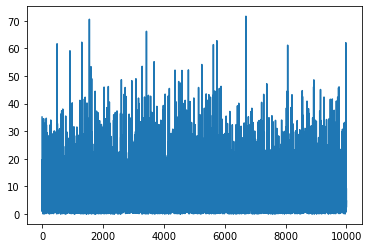

In [ ]:
import matplotlib.pyplot as plt
plt.plot(thresholds)
plt.show

In [ ]:
def calculate_motivations(thresholds,price_on_that_day):
  return  thresholds - price_on_that_day

def pick_most_motivated_players(motivations,supply):
  if(len(motivations[motivations > 0]) >= supply):
    return  (-motivations).argsort()[:supply]
  else:
    if(len(motivations[motivations > 0]) == 0):
      return []
    indices = [i for i in range(len(motivations))]
    indices = np.array(indices)
    return indices[motivations > 0]



In [ ]:
### Keeping the supply constant 
num_days = 300
parameters = []
max_price = 75
min_price = 5
thresholds = np.load("/content/drive/My Drive/threholds.npy")
total_revenue = 0
revenues = []
current_price = max_price
constant_decrement = 0.5
save_thresholds = np.copy(thresholds)
for i in range(num_days):
  parameters_on_a_day = {
    'supply': 100,
    'price' : 100
  }
  if(current_price < min_price):
    break
  parameters_on_a_day['price'] = current_price
  motivations = fcfs(thresholds,current_price)
  who_bought = pick_most_motivated_players(motivations,parameters_on_a_day['supply'])
  parameters_on_a_day['sold'] = len(who_bought)
  thresholds = np.delete(thresholds,who_bought)
  parameters.append(parameters_on_a_day)
  revenues.append(len(who_bought) * current_price)
  current_price = current_price - constant_decrement

revenues = np.array(revenues)
total_revenue = np.sum(revenues)
print(total_revenue)
plt.plot(revenues)
plt.show()

TypeError: ignored

In [ ]:
parameters

[{'price': 6, 'sold': 0, 'supply': 100},
 {'price': 5.9, 'sold': 0, 'supply': 100},
 {'price': 5.800000000000001, 'sold': 0, 'supply': 100},
 {'price': 5.700000000000001, 'sold': 0, 'supply': 100},
 {'price': 5.600000000000001, 'sold': 0, 'supply': 100},
 {'price': 5.500000000000002, 'sold': 0, 'supply': 100},
 {'price': 5.400000000000002, 'sold': 0, 'supply': 100},
 {'price': 5.3000000000000025, 'sold': 0, 'supply': 100},
 {'price': 5.200000000000003, 'sold': 0, 'supply': 100},
 {'price': 5.100000000000003, 'sold': 0, 'supply': 100},
 {'price': 5.0000000000000036, 'sold': 0, 'supply': 100},
 {'price': 4.900000000000004, 'sold': 0, 'supply': 100},
 {'price': 4.800000000000004, 'sold': 0, 'supply': 100},
 {'price': 4.700000000000005, 'sold': 0, 'supply': 100},
 {'price': 4.600000000000005, 'sold': 0, 'supply': 100},
 {'price': 4.500000000000005, 'sold': 0, 'supply': 100},
 {'price': 4.400000000000006, 'sold': 0, 'supply': 100},
 {'price': 4.300000000000006, 'sold': 0, 'supply': 100},
 {

In [ ]:
calculate_motivations(thresholds,5)

array([], dtype=float64)

In [ ]:
thresholds = np.load("/content/drive/My Drive/threholds.npy")
np.max(thresholds)

71.67573233038755

Trying Out First Model with Changing the Supply  


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
def calculate_motivations(thresholds,price_on_that_day):
  return  thresholds - price_on_that_day

def pick_most_motivated_players(motivations,supply):
  if(len(motivations[motivations > 0]) >= supply):
    return  (-motivations).argsort()[:supply]
  else:
    if(len(motivations[motivations > 0]) == 0):
      return []
    indices = [i for i in range(len(motivations))]
    indices = np.array(indices)
    return indices[motivations > 0]

def fcfs(motivations, supply):
  applicable_players = len(motivations[motivations > 0])

  if(applicable_players >= supply):
    indices = (-motivations).argsort()[:applicable_players]
    random.shuffle(indices)
    return indices[:supply]
  else:
    if(applicable_players == 0):
      return []
    indices = [i for i in range(len(motivations))]
    indices = np.array(indices)
    return indices[motivations > 0]

43785.5


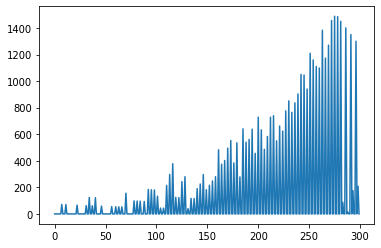

In [ ]:
### Keeping the supply constant 
parameters = []
num_players =  10000
num_days = 300
max_price = 75
min_price = 5
thresholds = np.load("/content/drive/My Drive/threholds.npy")
total_revenue = 0
revenues = []
current_price = max_price
current_supply = 100
change = {'price' : 0.5,'supply':10}
save_thresholds = np.copy(thresholds)
for i in range(num_days):
  parameters_on_a_day = {
    'supply': 100,
    'price' : 100
  }
  if(current_price < min_price):
    break
  parameters_on_a_day['price'] = current_price
  parameters_on_a_day['supply'] = current_supply
  motivations = calculate_motivations(thresholds,current_price)
  who_bought = pick_most_motivated_players(motivations,parameters_on_a_day['supply'])
  parameters_on_a_day['sold'] = len(who_bought)
  thresholds = np.delete(thresholds,who_bought)
  parameters_on_a_day['revenue'] = parameters_on_a_day['price']*parameters_on_a_day['sold']
  parameters.append(parameters_on_a_day)

  revenues.append(len(who_bought) * current_price)
  if(i != 0):
    diff_bought = parameters[-1]['sold'] - parameters[-2]['sold']
    diff_price = parameters[-1]['price'] - parameters[-2]['price']
    if(diff_bought > 0):
      if(diff_price <= 0):
        current_supply = current_supply + change['supply']
        current_price = current_price + change['price']
    else:
      if(diff_price > 0):
        current_supply = current_supply - change['supply']
        current_price = current_price - change['price']
      else:
        current_price = current_price - change['price']
  else:
    current_price = current_price - change['price']
  

revenues = np.array(revenues)
total_revenue = np.sum(revenues)
print(total_revenue)
plt.plot(revenues)
plt.show()

In [ ]:
thresholds

[{'price': 6, 'revenue': 600, 'sold': 100, 'supply': 100},
 {'price': 5.9, 'revenue': 590.0, 'sold': 100, 'supply': 100},
 {'price': 5.800000000000001,
  'revenue': 580.0000000000001,
  'sold': 100,
  'supply': 100},
 {'price': 5.700000000000001,
  'revenue': 570.0000000000001,
  'sold': 100,
  'supply': 100},
 {'price': 5.600000000000001,
  'revenue': 560.0000000000001,
  'sold': 100,
  'supply': 100},
 {'price': 5.500000000000002,
  'revenue': 550.0000000000002,
  'sold': 100,
  'supply': 100},
 {'price': 5.400000000000002,
  'revenue': 540.0000000000002,
  'sold': 100,
  'supply': 100},
 {'price': 5.3000000000000025,
  'revenue': 530.0000000000002,
  'sold': 100,
  'supply': 100},
 {'price': 5.200000000000003,
  'revenue': 520.0000000000002,
  'sold': 100,
  'supply': 100},
 {'price': 5.100000000000003,
  'revenue': 510.00000000000034,
  'sold': 100,
  'supply': 100},
 {'price': 5.0000000000000036,
  'revenue': 500.00000000000034,
  'sold': 100,
  'supply': 100},
 {'price': 4.900000

In [ ]:
max(thresholds)

5.8105504347189285

MDP 


In [ ]:
import numpy as np

In [ ]:
N = 100 #Number of items 
K = 1000 #Number of users 
preferences = []
for i in range(K):
  preferences.append(np.random.gumbel(loc = 0, scale = 5,size = N))

preferences = np.array(preferences) 

In [ ]:
def find_next_state(current_beta, current_price):
  #current_price is V_i and current_beta is K*N matrix where i,j th elment is 1 if ith player buys jth object
  new_beta = [[0]*N]*K

  for i in range(K):
    # utilities = np.array([])
    utilities =  preferences[i] +current_price
    index = np.argmax(utilities)
    new_beta[i][index] = 1
  return new_beta

In [ ]:
[[0]*2]*3

[[0, 0], [0, 0], [0, 0]]

In [ ]:
import numpy as np
import itertools 
import math
import copy
class MDP():
  def __init__(self,N,K,benefits):
    self.num_users = K
    self.num_items = N
    preferences = []
    for i in range(K):
      preferences.append(np.random.gumbel(loc = 0, scale = 5,size = N))
    self.preferences = np.array(preferences) 
    self.benefits = benefits
    lamda_expo = 0.2 * np.log(20/11)
# print(lamda_expo,1/lamda_expo)
    thr = np.random.exponential(scale = 1/lamda_expo,size = self.num_users)
    self.thresholds = thr


  def get_pref(self):
    return self.preferences

  def find_state(self,current_price):
    new_beta = [[0]*self.num_items]*self.num_users
    for i in range(self.num_users):
      # utilities = np.array([])
      utilities =  self.preferences[i] +current_price
      # index = np.argmax(utilities)
      index = None
      for j in range(len(utilities)):
        if(self.benefits[j] - current_price[j] <= self.thresholds[j]):
          if(index):
            if(utilities[index] < utilities[j]):
              index = j
          else:
            index = j
      new_beta[i][index] = 1
    return new_beta

  def Pi(self,benefit, cost, i):
    num = math.exp(benefit[i-1] - cost[i-1])
    denom = np.sum(np.exp(np.array(benefit) - np.asarray(cost)))
    return num/denom

  def qi(self,beta_new_i, beta_i, benefit, cost, i) :
    sigma = np.exp(-sum(np.square(beta_new_i - beta_i)))
    P_i = self.Pi(benefit, cost, i)
    return np.product(beta_new_i * P_i + (1 - beta_new_i) * (1 - P_i)) * sigma

  def transition_probability(self,beta_new, beta, costs) :
    prob = 1
    benefits = self.benefits
    beta_new = np.transpose(beta_new)
    beta = np.transpose(beta)
    for i in range(self.num_items):
      prob = prob* self.qi(beta_new[i], beta[i], benefits, costs, i+1)
    return prob

  def compute_revenue(self,beta,current_price):
    beta = np.transpose(beta)
    sum = 0
    for i in range(self.num_items):
      sum = sum + (self.benefits[i] - current_price[i])*np.sum(beta[i])
    return sum

  def generate_actions(self):
    N = self.num_items
    # K = self.num_players
    prices = [i+1 for i in range(10)]
    return list(itertools.product(prices,repeat = N))
  
  def generate_states(self,beta):
    N = len(beta[0])
    K = len(beta)
    ret = [beta]
    for j in range(K):
      for i in range(N):
        ret.append(copy.deepcopy(beta))
        ret[-1][j][i] = 1 - ret[-1][j][i]
    return ret


  def get_max(self,actions,values,states,state_id):
    q_s_a = []
    for i in range(len(actions)):
      val = self.compute_revenue(states[state_id],actions[i])
      instant_reward = self.compute_revenue(states[state_id],actions[i])
      TPM = []

      for s in range(len(states)):
        TPM.append(self.transition_probability(states[s],states[state_id],actions[i]))
      TPM = np.array(TPM)
      TPM = TPM / np.sum(TPM)
      # print(TPM)
      
      val = val + 0.65* np.sum(TPM*np.array(values))
      q_s_a.append(val)
    q_s_a = np.array(q_s_a)
    return q_s_a[np.argmax(q_s_a)],np.argmax(q_s_a) 

  def value_iteration(self,price,beta):
    K = self.num_users
    N = self.num_items
    states = self.generate_states(beta)
    all_actions = self.generate_actions()
    value_funs = [0]*len(states)
    optimal_actions = [[]]*len(states)
    value_funs_new = [0]*len(states)
    print('Running Value Iteration...')
    for i in range(15):
      print('Iteration : ',i)
      for s in range(len(states)):
        value_funs_new[s],optimal_actions[s] = self.get_max(all_actions,value_funs,states,s) 
      value_funs = copy.deepcopy(value_funs_new)
      print(value_funs)
      value_funs_new = [0]*len(states)
    return all_actions[optimal_actions[0]]

  def run_simulation(self,num_days):
    revenues = []
    start_price = [5]*self.num_items
    for i in range(num_days):
      print(start_price)
      state = self.find_state(current_price = start_price)
      revenues.append(self.compute_revenue(state,start_price))
      start_price = self.value_iteration(start_price,state)
      print(start_price)
      print(revenues[-1])
    return revenues  

In [ ]:
model = MDP(N = 3,K = 4,benefits = [10,11,12])

In [ ]:
N = 3
K = 4
model.run_simulation(10)

[5, 5, 5]
Running Value Iteration...
Iteration :  0
[36.0, 0.0, 76.0, 80.0, 0.0, 76.0, 80.0, 0.0, 76.0, 80.0, 0.0, 76.0, 80.0]
Iteration :  1
[61.97430096607624, 23.399999987630622, 125.38116475183567, 131.98249127125808, 23.399999987630622, 125.38116475183567, 131.98249127125808, 23.399999987630622, 125.38116475183567, 131.98249127125808, 23.399999987630622, 125.38116475183567, 131.98249127125808]
Iteration :  2
[86.44914520368954, 40.28329561469644, 157.4719506091306, 165.7648447769583, 40.28329561469644, 157.4719506091306, 165.7648447769583, 40.28329561469644, 157.4719506091306, 165.7648447769583, 40.28329561469644, 157.4719506091306, 165.7648447769583]
Iteration :  3
[102.91003319993933, 56.19194436653667, 178.32721372968524, 187.7196760298884, 56.19194436653667, 178.32721372968524, 187.7196760298884, 56.19194436653667, 178.32721372968524, 187.7196760298884, 56.19194436653667, 178.32721372968524, 187.7196760298884]
Iteration :  4
[115.21050033930388, 66.89152156390946, 191.88181088

[20, 4, 0, 4, 0, 4, 0, 4, 0, 4]

In [ ]:
print(model.thresholds)
print(model.benefits)

[17.6050373  21.3673934  10.13300808  1.14427058]
[20, 20, 20]


In [ ]:
print(model.preferences)

[[ 7.94388043 -7.50287866 -3.11876871]
 [ 4.59660073 -3.2260315   4.72963623]
 [-2.69373703  5.42322322 -3.97141164]
 [-3.74175283  5.18423982  2.7029401 ]]


In [ ]:
class A(B):
  def sum(self, a,b):
    return a+b
  
class B:
  def prod(self,a,b):
    return a*b

print(B().sum(3,4))

7


In [ ]:
class empl:
  def __init__(self):
    pass
  def hello(self):
    print('hi')
  def __del__(self):
    pass
onj = empl()
onj.hello()
del onj
onj.hello()

hi


NameError: ignored